In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("="*60)
print("IMDB TOP 1000 MOVIES & TV SHOWS - EXPLORATORY DATA ANALYSIS")
print("="*60)

IMDB TOP 1000 MOVIES & TV SHOWS - EXPLORATORY DATA ANALYSIS


# ============================================================================
# 1. BASIC INSPECTION
# ============================================================================


In [2]:
print("\n1. LOADING AND BASIC INSPECTION")
print("-" * 40)

# Load the dataset
df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nColumn Information:")
print(df.info())

print("\nMissing Values Count:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())




1. LOADING AND BASIC INSPECTION
----------------------------------------
Dataset Shape: (1000, 16)
Number of rows: 1000
Number of columns: 16

Column Names and Data Types:
Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

First 5 rows:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtim

# ============================================================================
# 2. DATA CLEANING CHECKS
# ============================================================================




2. DATA CLEANING CHECKS
----------------------------------------
Number of duplicate rows: 0

Missing Values Analysis:
             Missing Count  Missing Percentage
Gross                  169                16.9
Meta_score             157                15.7
Certificate            101                10.1


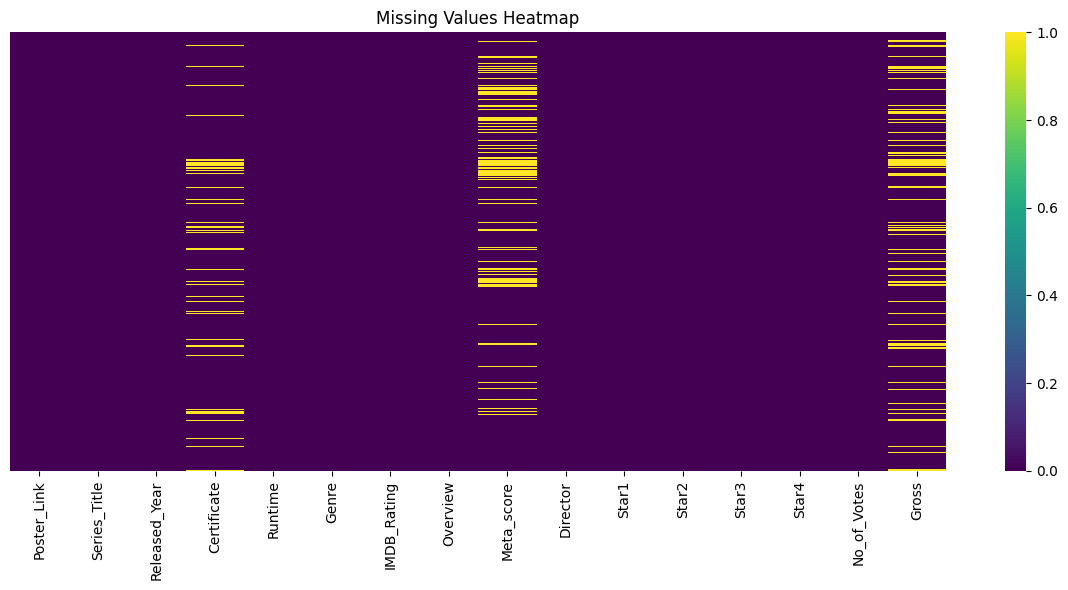

In [3]:
print("\n\n2. DATA CLEANING CHECKS")
print("-" * 40)

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Detailed missing value analysis
print("\nMissing Values Analysis:")
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()


# ============================================================================
# 3. UNIVARIATE ANALYSIS
# ============================================================================




3. UNIVARIATE ANALYSIS
----------------------------------------
Numeric columns: ['IMDB_Rating', 'Meta_score', 'No_of_Votes']
Categorical columns: ['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross']


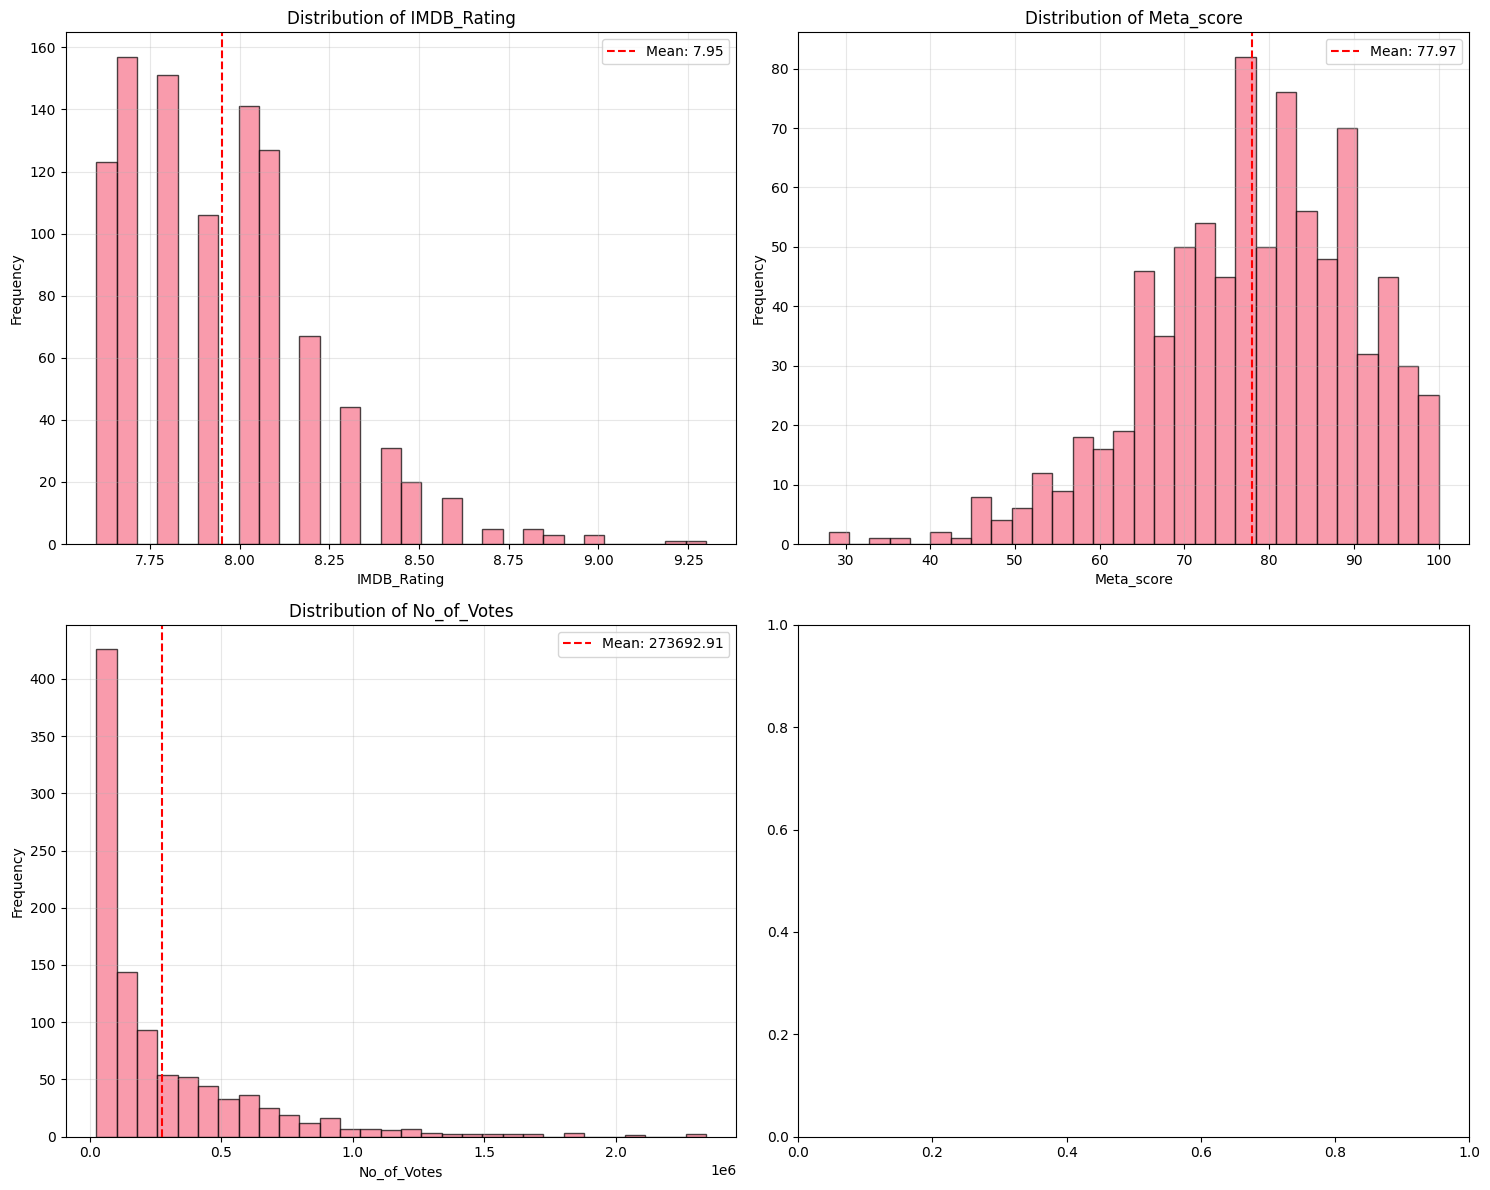

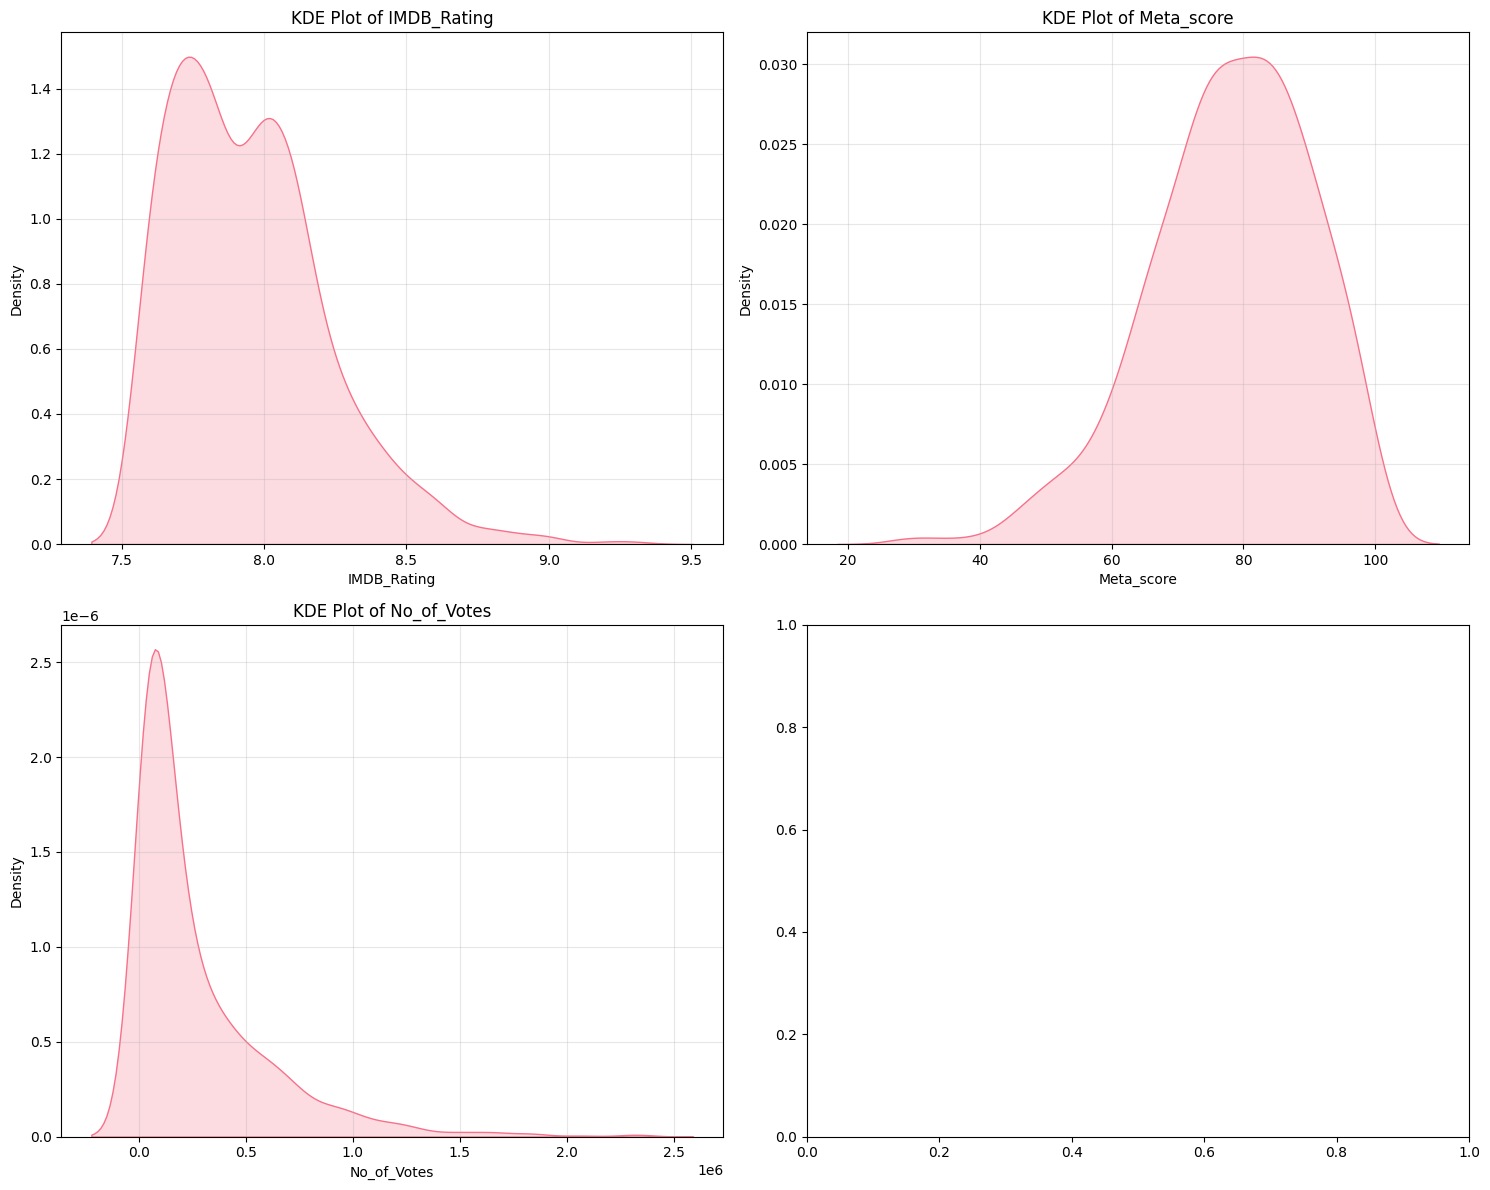

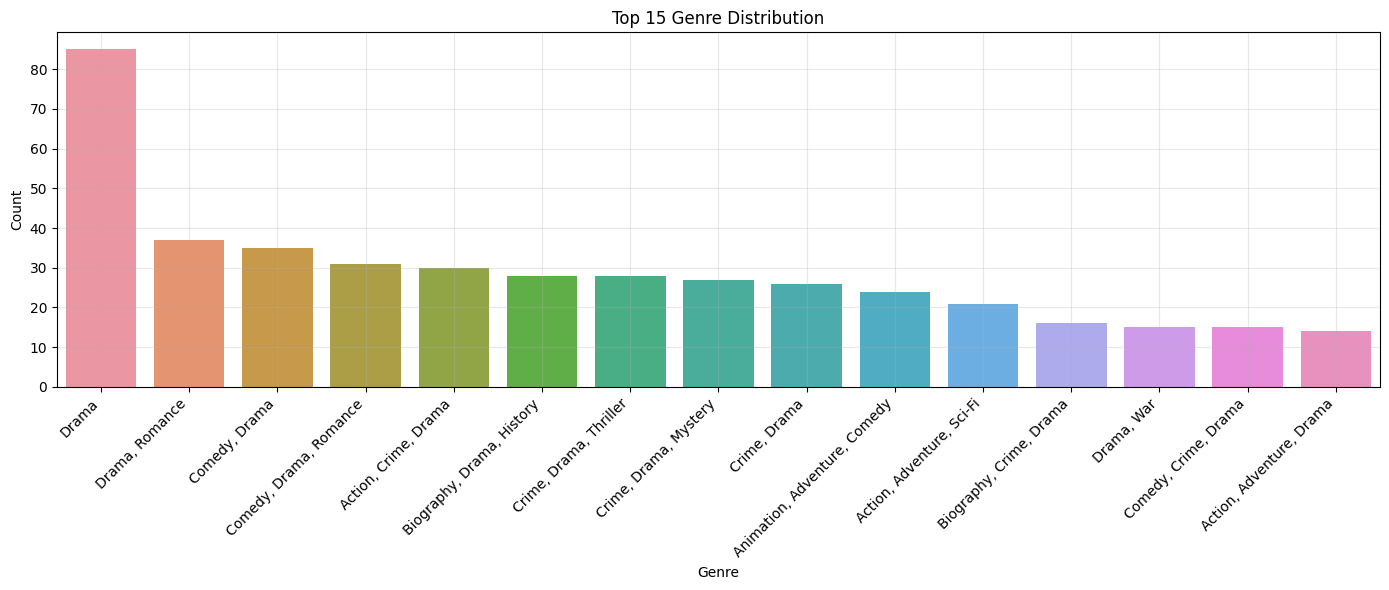

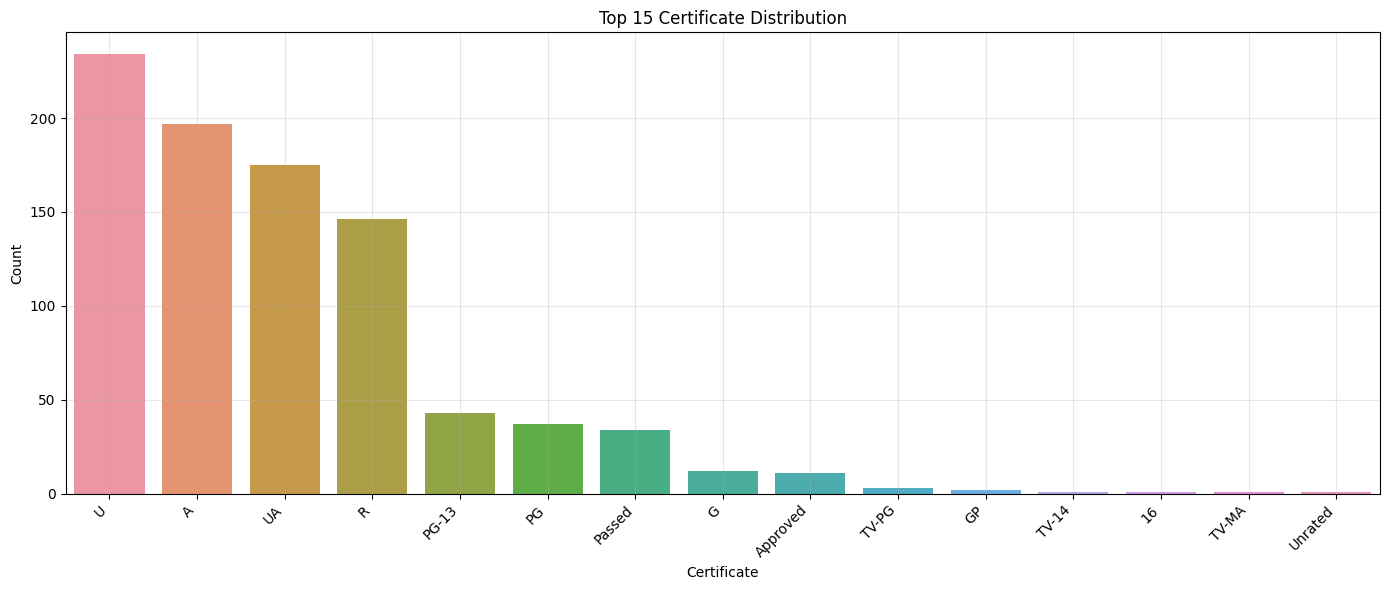

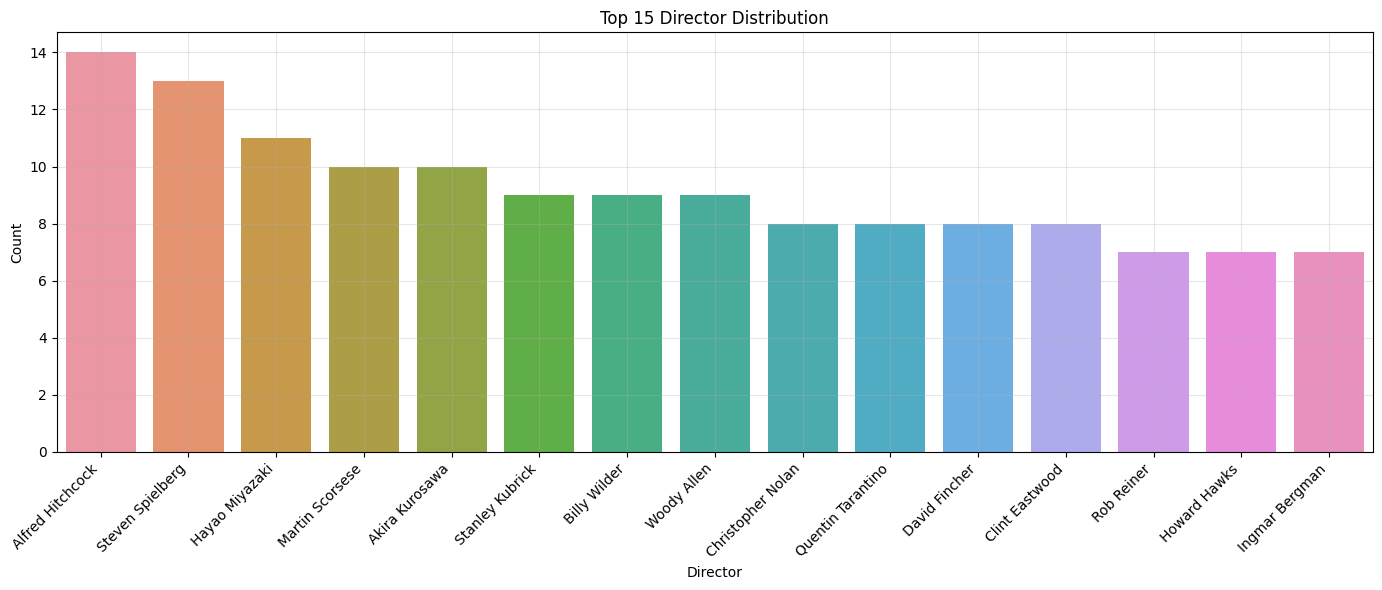

In [4]:

print("\n\n3. UNIVARIATE ANALYSIS")
print("-" * 40)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Distribution plots for numeric variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:4]):
    if col in df.columns:
        # Histogram with KDE
        df[col].hist(bins=30, alpha=0.7, ax=axes[i], edgecolor='black')
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# KDE plots for numeric variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:4]):
    if col in df.columns:
        sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
        axes[i].set_title(f'KDE Plot of {col}')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Count plots for categorical variables (top categories only)
categorical_to_plot = ['Genre', 'Certificate', 'Director']

for col in categorical_to_plot:
    if col in df.columns:
        plt.figure(figsize=(14, 6))
        
        # Get top 15 categories
        top_categories = df[col].value_counts().head(15)
        
        sns.countplot(data=df[df[col].isin(top_categories.index)], 
                     x=col, order=top_categories.index)
        plt.title(f'Top 15 {col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


# ============================================================================
# 4. BIVARIATE ANALYSIS
# ============================================================================




4. BIVARIATE ANALYSIS
----------------------------------------


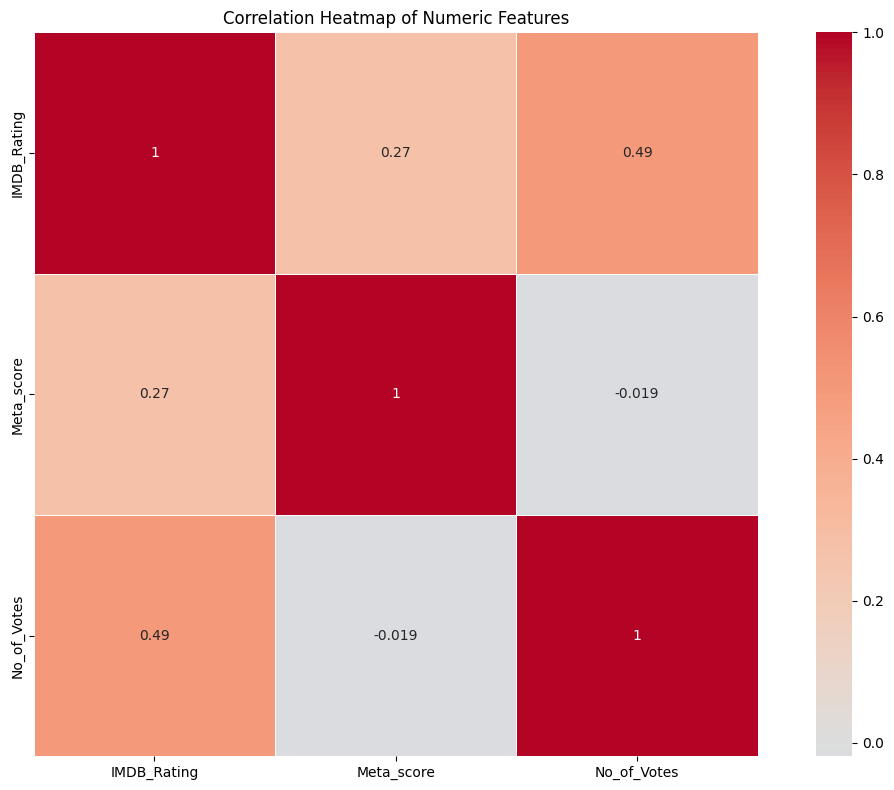

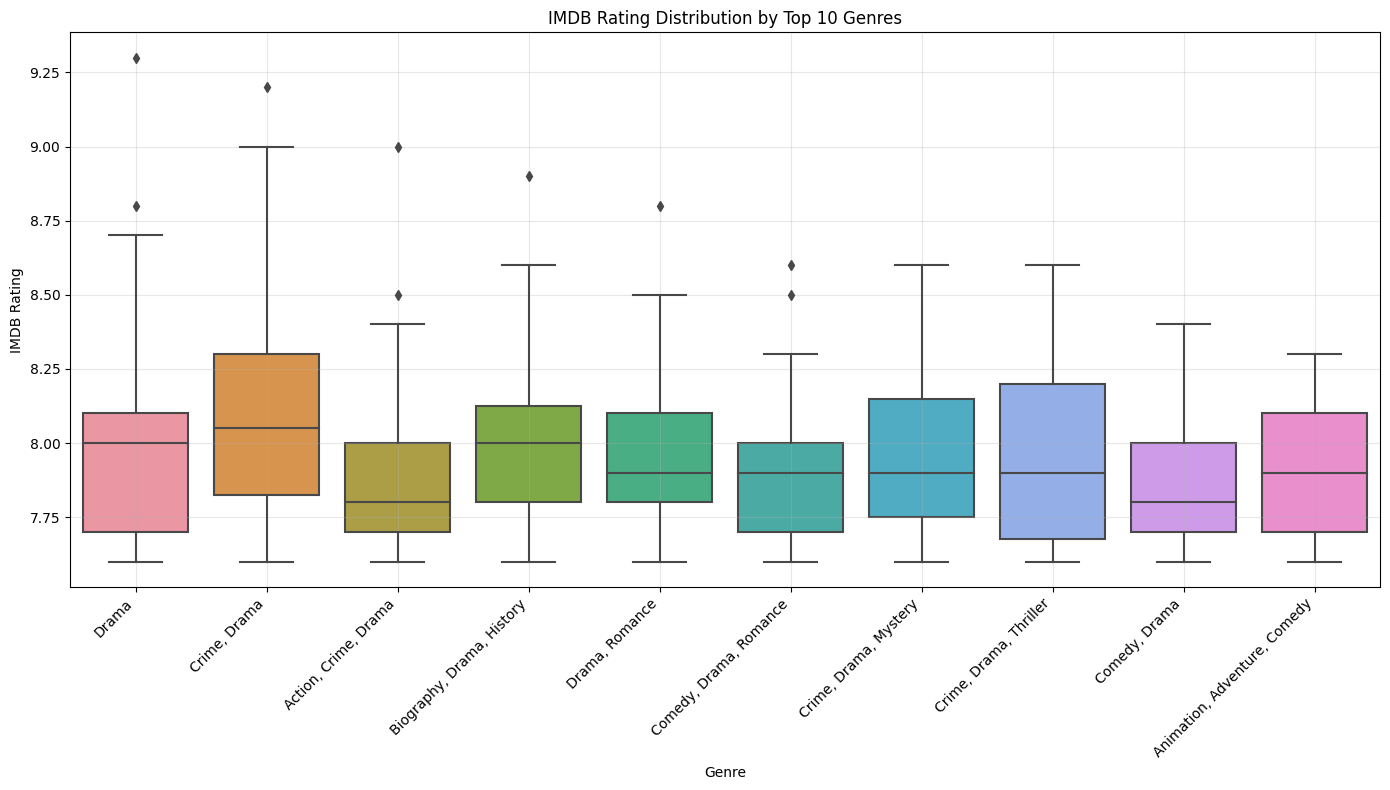

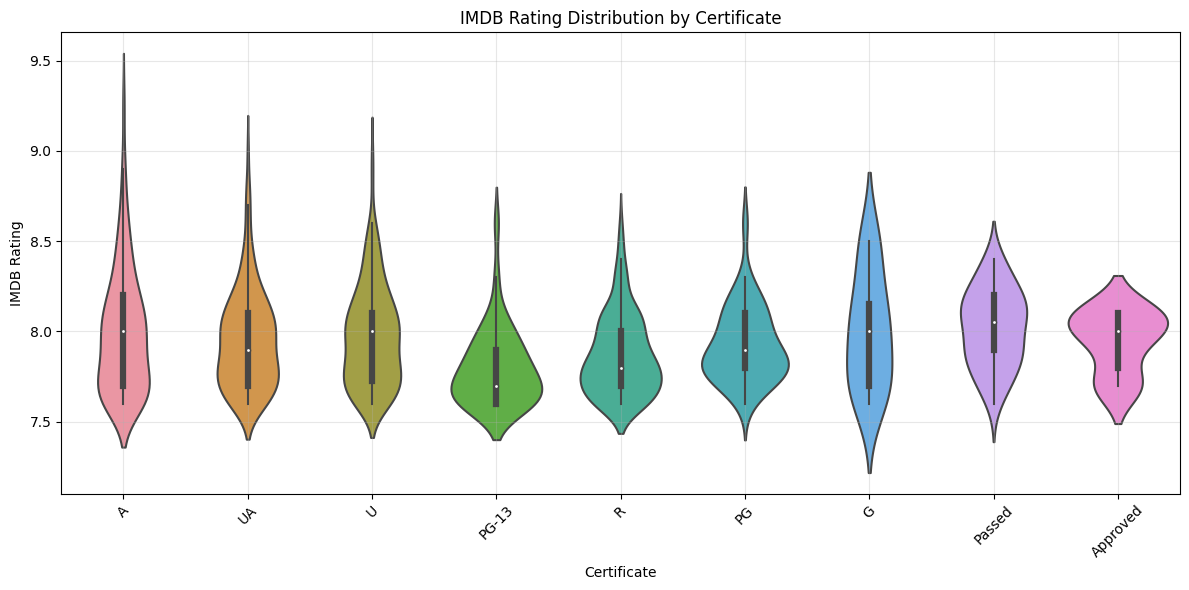

⚠️ No valid Gross/IMDB_Rating data available for scatter plot.


In [13]:

print("\n\n4. BIVARIATE ANALYSIS")
print("-" * 40)

# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# IMDB Rating vs Genre (if these columns exist)
if 'IMDB_Rating' in df.columns and 'Genre' in df.columns:
    plt.figure(figsize=(14, 8))
    
    # Get top 10 genres for cleaner visualization
    top_genres = df['Genre'].value_counts().head(10).index
    df_top_genres = df[df['Genre'].isin(top_genres)]
    
    sns.boxplot(data=df_top_genres, x='Genre', y='IMDB_Rating')
    plt.title('IMDB Rating Distribution by Top 10 Genres')
    plt.xlabel('Genre')
    plt.ylabel('IMDB Rating')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Violin plot for IMDB Rating vs Certificate
if 'IMDB_Rating' in df.columns and 'Certificate' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Filter out certificates with very few movies
    cert_counts = df['Certificate'].value_counts()
    valid_certs = cert_counts[cert_counts >= 10].index
    df_valid_certs = df[df['Certificate'].isin(valid_certs)]
    
    sns.violinplot(data=df_valid_certs, x='Certificate', y='IMDB_Rating')
    plt.title('IMDB Rating Distribution by Certificate')
    plt.xlabel('Certificate')
    plt.ylabel('IMDB Rating')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Scatterplots for continuous features
# Gross Earnings vs IMDB Rating
if 'Gross' in df.columns and 'IMDB_Rating' in df.columns:
    # Ensure Gross is numeric
    df['Gross'] = (
        df['Gross']
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('$', '', regex=False)
        .str.strip()
    )
    df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
    
    # Clean dataset
    df_clean = df.dropna(subset=['Gross', 'IMDB_Rating'])
    
    if not df_clean.empty:
        plt.figure(figsize=(12, 8))
        plt.scatter(df_clean['IMDB_Rating'], df_clean['Gross'], alpha=0.6, s=50)
        plt.title('Gross Earnings vs IMDB Rating')
        plt.xlabel('IMDB Rating')
        plt.ylabel('Gross Earnings')
        plt.grid(True, alpha=0.3)

        # Correlation
        corr_coef = df_clean['IMDB_Rating'].corr(df_clean['Gross'])
        plt.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', 
                 transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

        # Trend line (only if >= 2 points)
        if len(df_clean) >= 2:
            z = np.polyfit(df_clean['IMDB_Rating'], df_clean['Gross'], 1)
            p = np.poly1d(z)
            plt.plot(df_clean['IMDB_Rating'], p(df_clean['IMDB_Rating']), "r--", alpha=0.8)

        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No valid Gross/IMDB_Rating data available for scatter plot.")


# ============================================================================
# 5. INSIGHTS-FOCUSED PLOTS
# ============================================================================




5. INSIGHTS-FOCUSED ANALYSIS
----------------------------------------


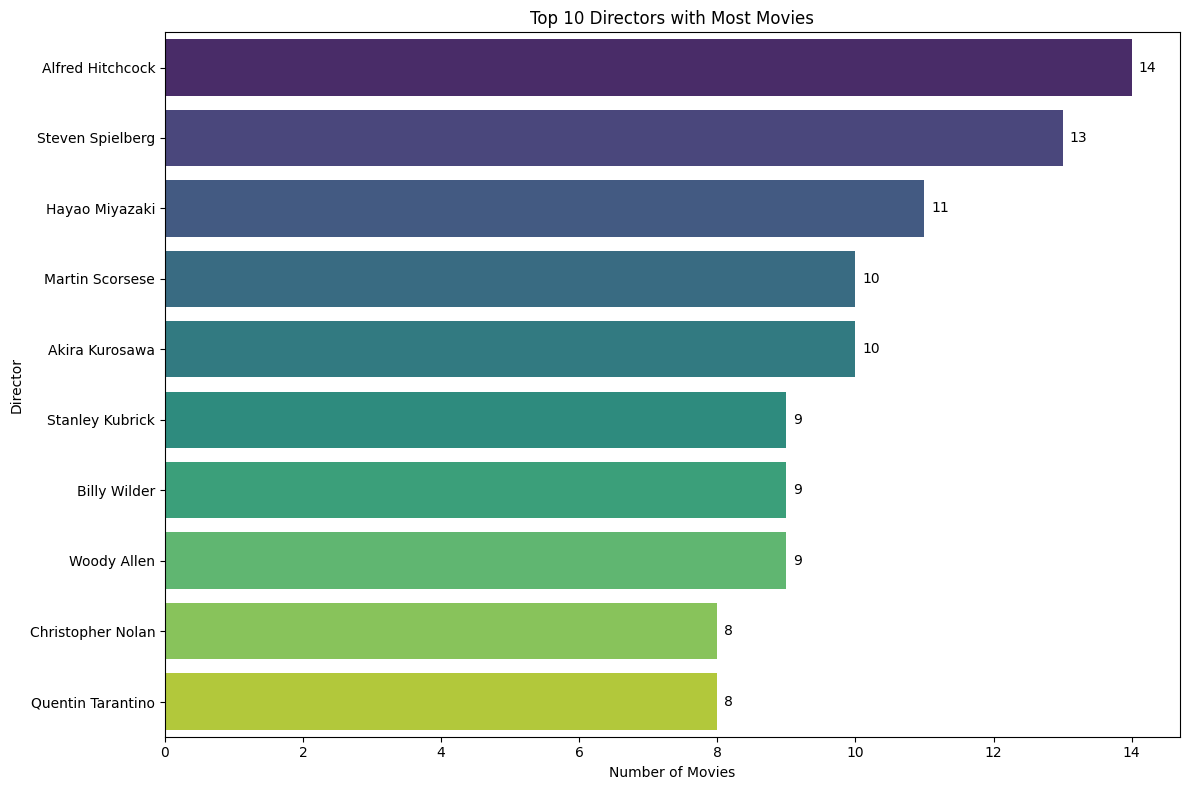

Top 10 Directors:
Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
Name: count, dtype: int64


<Figure size 1400x600 with 0 Axes>

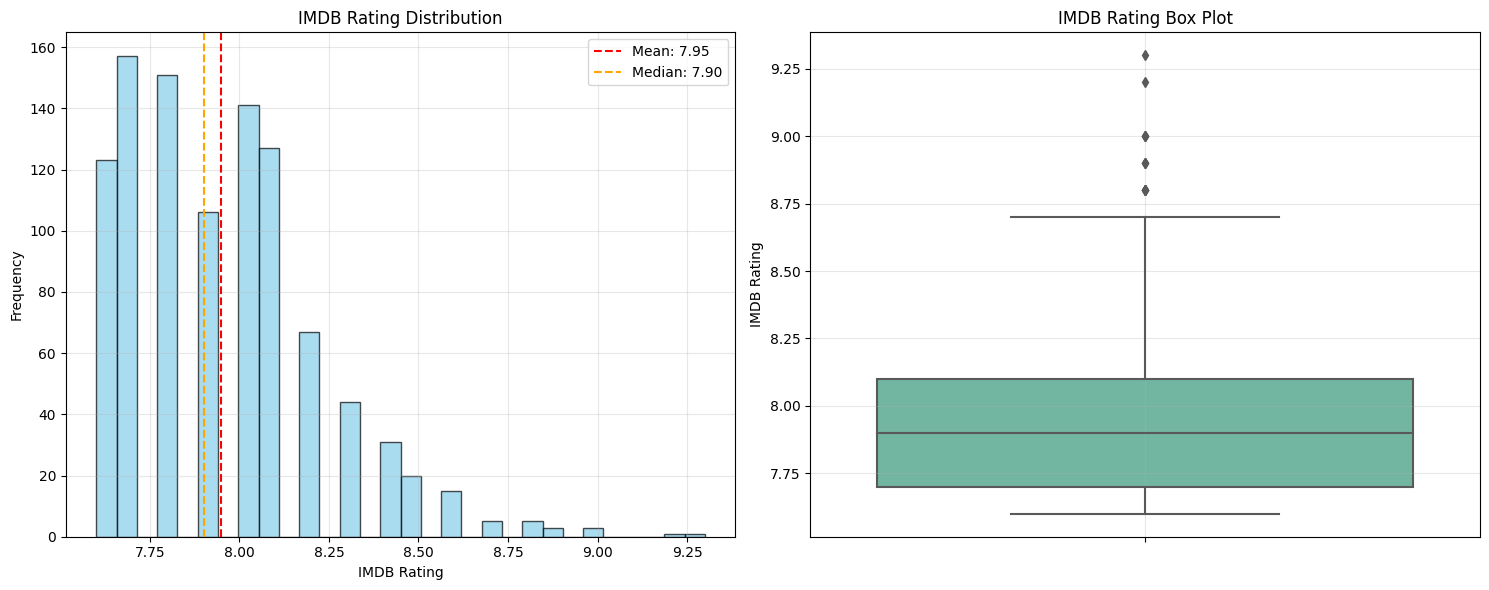

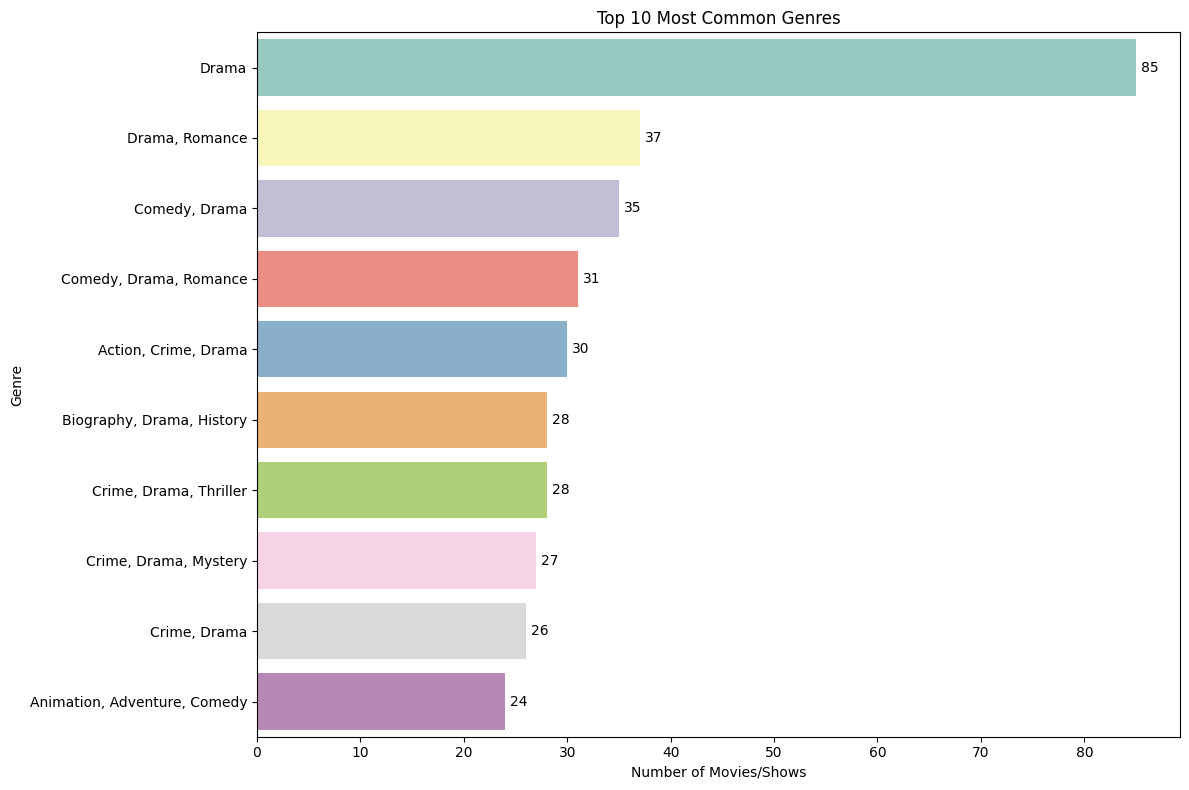

Top 10 Genres:
Genre
Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: count, dtype: int64
⚠️ No valid Gross/IMDB_Rating data available for scatter plot.


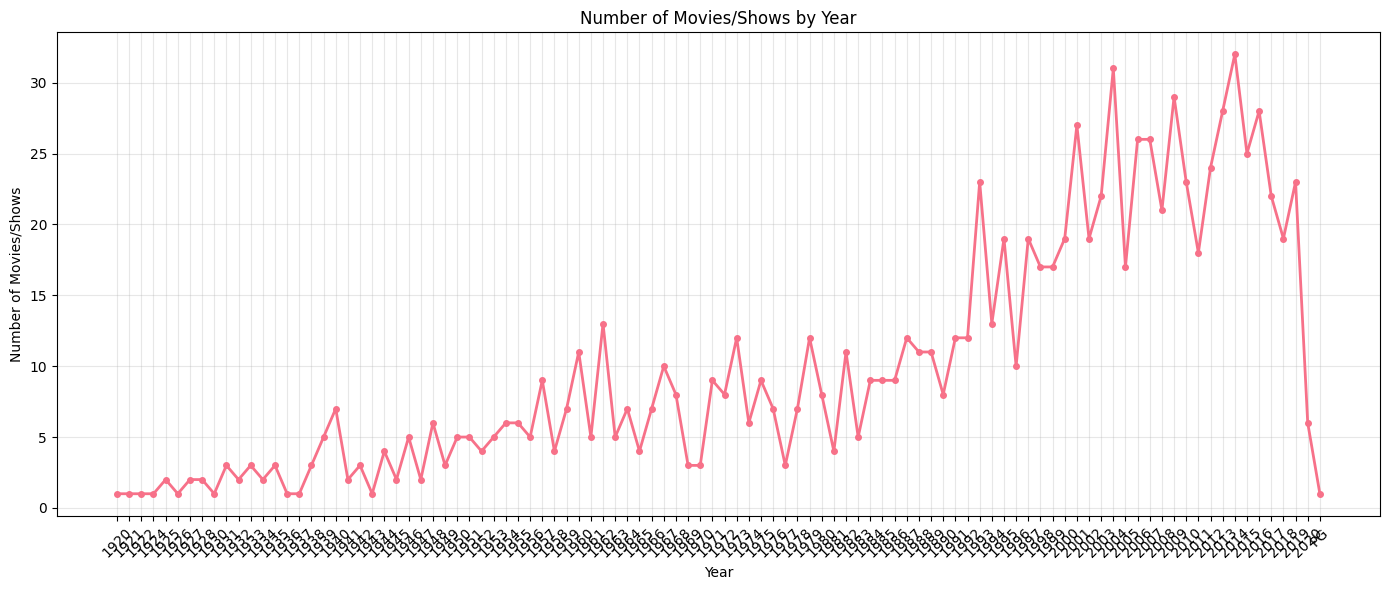

In [14]:

print("\n\n5. INSIGHTS-FOCUSED ANALYSIS")
print("-" * 40)

# Top 10 Directors with most movies
if 'Director' in df.columns:
    plt.figure(figsize=(12, 8))
    
    top_directors = df['Director'].value_counts().head(10)
    
    sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
    plt.title('Top 10 Directors with Most Movies')
    plt.xlabel('Number of Movies')
    plt.ylabel('Director')
    
    # Add value labels on bars
    for i, v in enumerate(top_directors.values):
        plt.text(v + 0.1, i, str(v), va='center')
    
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Directors:")
    print(top_directors)

# Distribution of IMDB Ratings
if 'IMDB_Rating' in df.columns:
    plt.figure(figsize=(14, 6))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histogram
    df['IMDB_Rating'].hist(bins=30, alpha=0.7, ax=ax1, edgecolor='black', color='skyblue')
    ax1.axvline(df['IMDB_Rating'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["IMDB_Rating"].mean():.2f}')
    ax1.axvline(df['IMDB_Rating'].median(), color='orange', linestyle='--', 
                label=f'Median: {df["IMDB_Rating"].median():.2f}')
    ax1.set_title('IMDB Rating Distribution')
    ax1.set_xlabel('IMDB Rating')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plot
    sns.boxplot(y=df['IMDB_Rating'], ax=ax2, palette='Set2')
    ax2.set_title('IMDB Rating Box Plot')
    ax2.set_ylabel('IMDB Rating')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Top 10 Genres frequency
if 'Genre' in df.columns:
    plt.figure(figsize=(12, 8))
    
    top_genres = df['Genre'].value_counts().head(10)
    
    # Create a horizontal bar plot
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set3')
    plt.title('Top 10 Most Common Genres')
    plt.xlabel('Number of Movies/Shows')
    plt.ylabel('Genre')
    
    # Add value labels
    for i, v in enumerate(top_genres.values):
        plt.text(v + 0.5, i, str(v), va='center')
    
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Genres:")
    print(top_genres)

# Gross Earnings vs IMDB Rating
# Gross Earnings vs IMDB Rating
if 'Gross' in df.columns and 'IMDB_Rating' in df.columns:
    # Ensure Gross is numeric
    df['Gross'] = (
        df['Gross']
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('$', '', regex=False)
        .str.strip()
    )
    df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
    
    # Clean dataset
    df_clean = df.dropna(subset=['Gross', 'IMDB_Rating'])
    
    if not df_clean.empty:
        plt.figure(figsize=(12, 8))
        plt.scatter(df_clean['IMDB_Rating'], df_clean['Gross'], alpha=0.6, s=50)
        plt.title('Gross Earnings vs IMDB Rating')
        plt.xlabel('IMDB Rating')
        plt.ylabel('Gross Earnings')
        plt.grid(True, alpha=0.3)

        # Correlation
        corr_coef = df_clean['IMDB_Rating'].corr(df_clean['Gross'])
        plt.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', 
                 transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

        # Trend line (only if >= 2 points)
        if len(df_clean) >= 2:
            z = np.polyfit(df_clean['IMDB_Rating'], df_clean['Gross'], 1)
            p = np.poly1d(z)
            plt.plot(df_clean['IMDB_Rating'], p(df_clean['IMDB_Rating']), "r--", alpha=0.8)

        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No valid Gross/IMDB_Rating data available for scatter plot.")

# Year-wise movie count (if Released_Year exists)
year_columns = ['Released_Year', 'Year', 'Release_Year']
year_col = None
for col in year_columns:
    if col in df.columns:
        year_col = col
        break

if year_col:
    plt.figure(figsize=(14, 6))
    
    # Group by year and count
    yearly_counts = df[year_col].value_counts().sort_index()
    
    plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=4)
    plt.title('Number of Movies/Shows by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies/Shows')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
